# Introdiction to spaCy - an NLP library for Python
____________________________

### General Notes
- spaCy is an NLP library written in Cython. It is designed for production use, so it scales well and can handle processing large volumes of text.  


- spaCy seems to be a popular and well-reviewer library specifically for text preprocessing. There are a lot of features that I will introduce that allow you to tokenize, tag, and parse text files.   


- To download a model from a Credit Suisse VM, you'll need to follow some steps to connect external sites from your desktop. Even after getting my proxy set up to clone the spaCy repo, installation from their GitHub requires Microsoft Visual Studio C++, which requires access through MyAccess.  


- This demo was made on my own computer, where installation and downloading models was simple. Perhaps a future demo on setting up and using the pxproxy would prove helpful for using more of these tools that require internet access for downloading data and models. 


Link to spaCy Home Page: https://spacy.io/

### Installation with pip or conda

Make sure pip, setuptools, and wheel are updated, then install spacy library:

```
pip install -U pip setuptools wheel 
pip install -U spacy
```
or with conda forge:
```
conda install -c conda-forge spacy

```

### Downloading a pre-trained model or pipeline

```
python -m spacy download en_core_web_sm
```

Note the "\_sm" suffix. spaCy provides both small and large models for each language. 

### Loading a model

In [4]:
import spacy

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
nlp("Hi, my name is Riley")

Hi, my name is Riley

In [7]:
type(nlp("Hi, my name is Riley"))

spacy.tokens.doc.Doc

In [8]:
[t for t in nlp("Hi, my name is Riley")]

[Hi, ,, my, name, is, Riley]

In [9]:
type(nlp("Hi, my name is Riley")[0])

spacy.tokens.token.Token

In [10]:
t = nlp("Hi, my name is Riley")[-1]
print(t)

Riley


Press tab after a token object to see all the attached properties

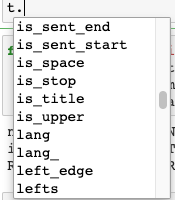

In [12]:
for token in nlp("Hi, my name is Riley")[-3:]:
    print(token.text, '  -  ',
          token.lemma_, token.pos_, token.shape_,
          token.is_alpha, token.is_stop)

name   -   name NOUN xxxx True True
is   -   be AUX xx True True
Riley   -   Riley PROPN Xxxxx True False


In [13]:
# spacy proivides example sentences in each language
from spacy.lang.en.examples import sentences 

In [14]:
doc1 = nlp("My incredible wife is sitting right beside me, reading a book.")
doc2 = nlp("I'm exhausted and don't feel like working today.")
doc3 = nlp(sentences[0])
doc4 = nlp(sentences[6])

In [15]:
print(doc1, '\n', doc2, '\n', doc3, '\n', doc4)

My incredible wife is sitting right beside me, reading a book. 
 I'm exhausted and don't feel like working today. 
 Apple is looking at buying U.K. startup for $1 billion 
 What is the capital of the United States?


In [16]:
print(doc3)
for token in doc3:
    print(token.text, ' - ',
          token.lemma_, token.pos_, token.dep_, token.tag_)

Apple is looking at buying U.K. startup for $1 billion
Apple  -  Apple PROPN nsubj NNP
is  -  be AUX aux VBZ
looking  -  look VERB ROOT VBG
at  -  at ADP prep IN
buying  -  buy VERB pcomp VBG
U.K.  -  U.K. PROPN dobj NNP
startup  -  startup VERB dep VBD
for  -  for ADP prep IN
$  -  $ SYM quantmod $
1  -  1 NUM compound CD
billion  -  billion NUM pobj CD


lemma_ = base form of word, found via lookup (different from stem, which is a shortened form of the word, not found by lookup and therefore may not be an actual word.)   
pos_ = part-of-speech   
dep_ = dependency   
is_alpha = is the token made of alphanumeric characters   
is_stop = is the token part of a stop list (the most common words in the language)   

A token has many more attributes, which can be found at https://spacy.io/api/token#attributes

## Features

### Tokenization

Raw text splits on whitespace characters, then processed from left to right checking for special cases. 

In [17]:
print([t for t in doc1])
print(type(doc1))
print(type(doc1[0]))

[My, incredible, wife, is, sitting, right, beside, me, ,, reading, a, book, .]
<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.token.Token'>


The docs are processed and split into individual words, with each annotated, but it still holds all the information of the original text, like whitespace characters and punctuation. 

### Part-of-speech Tagging and Dependencies

These tags are predictions made by the model, so a larger model or a fine-tuned model to your dataset would have more accurate tags.

In [18]:
for token in doc1:
    print(token.text, token.pos_, token.dep_,)

My PRON poss
incredible ADJ amod
wife NOUN nsubj
is AUX aux
sitting VERB ROOT
right ADV advmod
beside ADP prep
me PRON pobj
, PUNCT punct
reading VERB advcl
a DET det
book NOUN dobj
. PUNCT punct


In [19]:
# Look at the base noun phrases
for chunk in doc1.noun_chunks:
    print(chunk.text, '-', chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

My incredible wife - wife nsubj sitting
me - me pobj beside
a book - book dobj reading


spaCy has a built-in visualizer called displaCy, which can be used to visualize the dependencies in a text. 

See https://spacy.io/usage/visualizers for a guide on how to use and style different visualizations.

In [20]:
from spacy import displacy
displacy.render(doc1, style="dep") 
# displacy.serve(doc, style="dep") #displacy.serve opens the visualization in another window, 

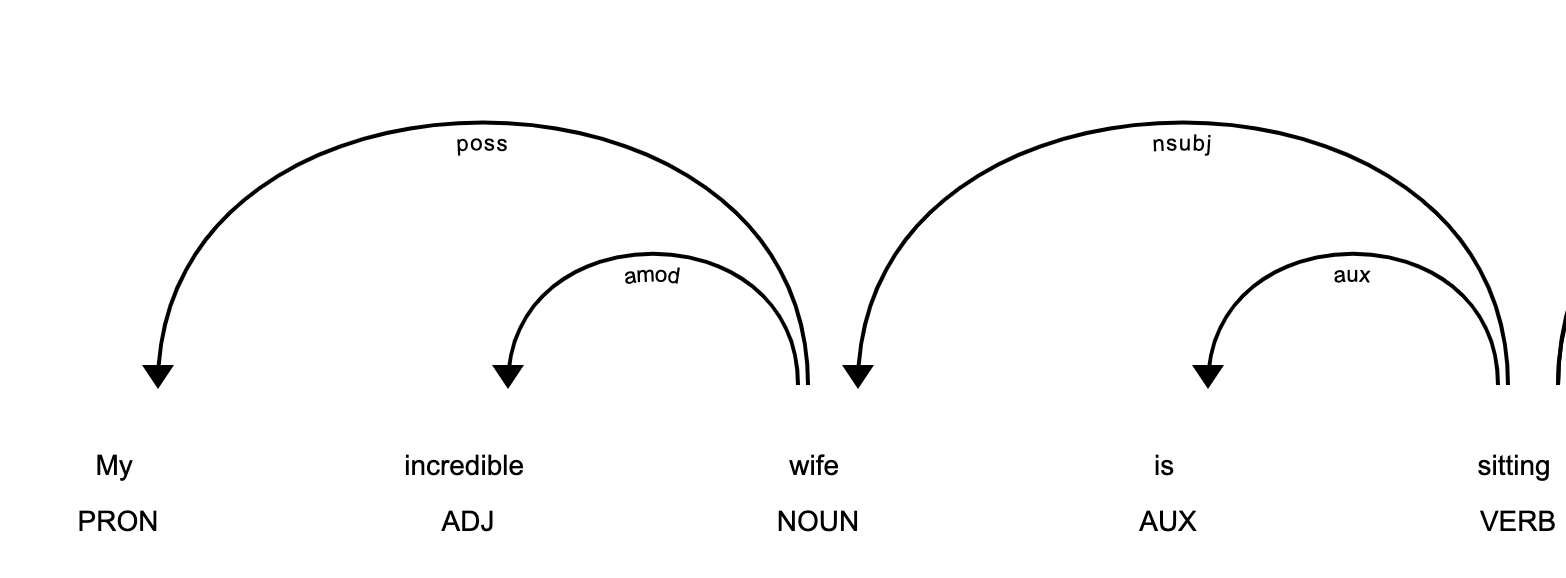

In [21]:
spacy.explain("amod")

'adjectival modifier'

In [22]:
# the visualizer can also be customized
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.render(doc2, style="dep", options=options)

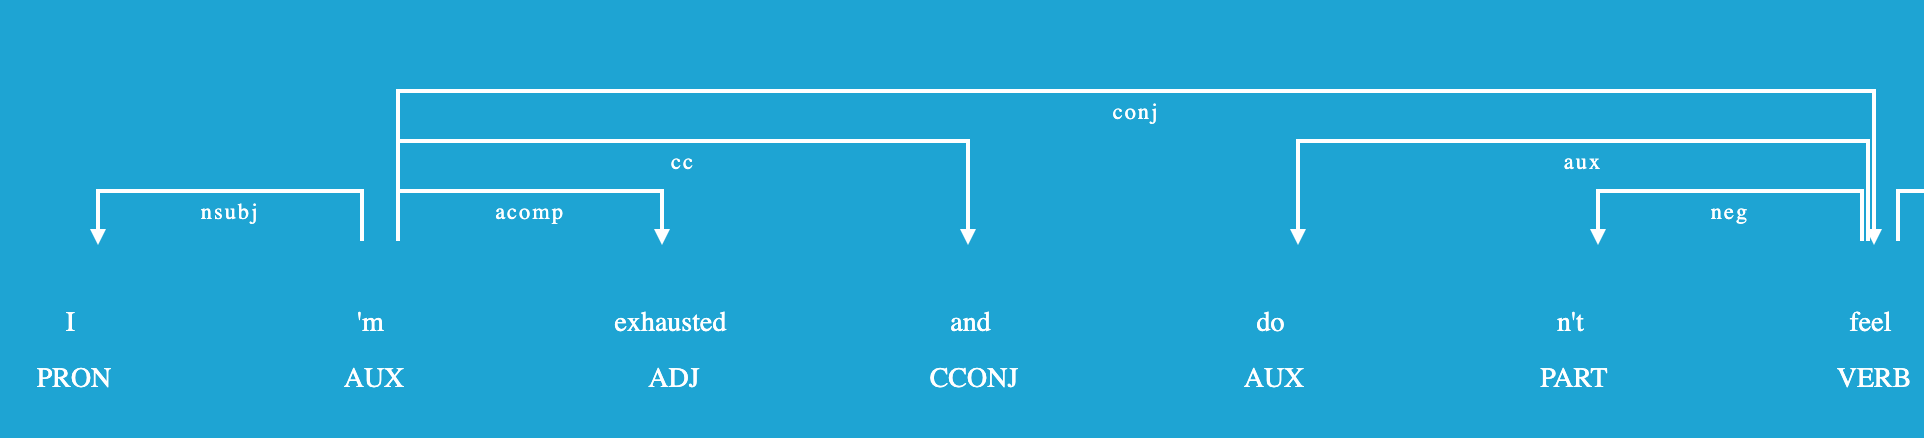

### Named Entity Recognition

In [23]:
print(doc3)
print()
for ent in doc3.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple is looking at buying U.K. startup for $1 billion

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [24]:
spacy.explain("GPE")

'Countries, cities, states'

In [25]:
# the downloaded model is a statistical model, 
# so an empty result means that the model predicted no entities in the text
print(doc1)
doc1.ents 

My incredible wife is sitting right beside me, reading a book.


()

In [26]:
print(doc2)
doc2.ents

I'm exhausted and don't feel like working today.


(today,)

In [27]:
print(doc4)
doc4.ents

What is the capital of the United States?


(the United States,)

In [28]:
# You can also visualize named entities with displaCy
displacy.render(doc3, style="ent")

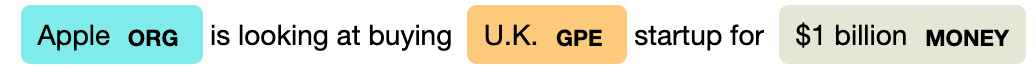

### Word Vectors and Similarity

In [29]:
nlp_lg = spacy.load("en_core_web_lg") 

# the large model has 685k unique vectors, so it's more likely to include rarer tokens

In [30]:
tokens = nlp_lg("cat lion bank deposit Credit Suisse lol njiwefp")

In [31]:
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

cat True 6.6808186 False
lion True 6.5120897 False
bank True 6.9143744 False
deposit True 7.522956 False
Credit True 6.8050623 False
Suisse True 7.4896507 False
lol True 6.660215 False
njiwefp False 0.0 True


In [32]:
doc3 = nlp("I love to play basketball")
doc4 = nlp("I enjoy shooting hoops")
print(doc3, "<->", doc4, '\n', doc3.similarity(doc4))

I love to play basketball <-> I enjoy shooting hoops 
 0.7365455986925641


/Users/rmbuch/opt/anaconda3/envs/riley-spacy/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
doc3 = nlp_lg("I love to play basketball")
doc4 = nlp_lg("I enjoy shooting hoops")
print(doc3, "<->", doc4, '\n', doc3.similarity(doc4))

I love to play basketball <-> I enjoy shooting hoops 
 0.824674674710138


In [34]:
doc3 = nlp("I don't mind eating salad for dinner")
doc4 = nlp("I abhor being served vegetables in the evening")
print(doc3, "<->", doc4, '\n', doc3.similarity(doc4))

I don't mind eating salad for dinner <-> I abhor being served vegetables in the evening 
 0.5166853115012223


/Users/rmbuch/opt/anaconda3/envs/riley-spacy/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
doc3 = nlp_lg("I don't mind eating salad for dinner")
doc4 = nlp_lg("I abhor being served vegetables in the evening")
print(doc3, "<->", doc4, '\n', doc3.similarity(doc4))

I don't mind eating salad for dinner <-> I abhor being served vegetables in the evening 
 0.8420926615828694


Each Doc, Span, and Token comes with a ".vector" and a ".similarity" attribute. 

In [57]:
nlp_lg("Life sucks, doesn't it.").similarity(nlp_lg("Life doesn't suck"))

0.9271043469815061

Remember, there is no objective definition of similarity. The similarity is based on the average of token vectors, meaning it's insensitive to word order.

There is a library called sense2vec, built on top of spaCy the lets you train and query more detailed and context-sensitive word vectors. 

## Architecture

Lanuage class = class used to process a text and turn it into a Doc object. Typically stored as variable called "nlp".  

Vocab = where strings, word vectors, and lexical attributes are stored. This is centralized, avoiding the need to store multiple copies of data.  

Doc object = owns sequence of tokens and all annotations

Span (small slice of the Doc) and Token (individual word, symbol, punctuation, etc.) are views that point to the Doc object.


### Vocab and Hashes

spaCy encodes all strings to hash values to reduce memory and increase efficiency.

If you process lots of documents that contain the word "book", storing "book" every time would take up too much space. spaCy stores it in the StringStore object (basically a lookup table) and then the doc object stores a hash that points to that string.

In [36]:
print(doc1)

My incredible wife is sitting right beside me, reading a book.


In [37]:
print(doc1.vocab.strings['book'])
print(nlp("How many books do you have on your bookshelf?").vocab.strings['book'])

13814433107111459297
13814433107111459297


In [38]:
doc1.vocab.strings[13814433107111459297]

'book'

spaCy exports the Vocab when you save a Doc object or NLP object so that you have the object, the encoded annotations, and the key to decode it. This avoids a situation where a hash is trying to point to a word in the Vocab() that doesn't exist.

### Serialization

Save your progress by translating your nlp obect (its contents and structure) into a file or byte string. spaCy comes with built-in support for Pickle.

In [39]:
# store the config, which contains the pipeline configuration and all relevant settings
config = nlp.config

In [40]:
print(config.keys())

dict_keys(['paths', 'system', 'nlp', 'components', 'corpora', 'training', 'pretraining', 'initialize'])


In [41]:
data = nlp.to_bytes()

In [42]:
# deserialize
lang_cls = spacy.util.get_lang_class(config["nlp"]["lang"])
nlp = lang_cls.from_config(config)
nlp.from_bytes(data)

In [43]:
#create a folder at the path with tokenizer, and folders for each component
# nlp.to_disk("saved_nlp_object_path") 

### Language Data

spaCy provides different pre-trained models in 19 different languages, and has support for 64. 

```
python -m spacy download es_core_news_sm
```

In [45]:
nlp_es = spacy.load('es_core_news_sm')

In [46]:
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_sm")
doc = nlp(sentences[0])

In [47]:
print(doc.text)
print()
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple está buscando comprar una startup del Reino Unido por mil millones de dólares.

Apple PROPN nsubj
está AUX aux
buscando VERB ROOT
comprar VERB xcomp
una DET det
startup NOUN obj
del ADP case
Reino PROPN nmod
Unido PROPN flat
por ADP case
mil NUM nummod
millones NOUN obl
de ADP case
dólares NOUN nmod
. PUNCT punct


__________________________
## Toy Problem - Sentiment Analysis

### Loading in Data

Loading in a CSV downloaded from Kaggle (https://www.kaggle.com/sbhatti/financial-sentiment-analysis)

This is a Financial Sentiment Analysis Dataset, but I will use it for NER.
- FiQA and Financial PhraseBank combined into one CSV

In [48]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [49]:
df.shape

(5842, 2)

In [50]:
sentences = [_ for _ in df['Sentence']]
sentences[0:5]

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
 '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
 'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .',
 'The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .']

In [51]:
nlp = spacy.load("en_core_web_lg")

In [52]:
nlp2 = spacy.load("en_core_web_lg", disable=["parser", "attribute-rule", "lemmatizer"])

In [53]:
# Find labeled entities from the first 5 sentences
for doc in nlp.pipe(sentences[0:10]):
    print([(ent.text, ent.label_) for ent in doc.ents])

[('GeoSolutions', 'ORG'), ('Benefon', 'PERSON'), ('GPS', 'ORG'), ('Location Based Search Technology', 'ORG')]
[('ESI', 'ORG'), ('$1.50 to $2.50', 'MONEY'), ('BK', 'ORG')]
[('the last quarter of 2010', 'DATE'), ('Componenta', 'GPE'), ('the same period', 'DATE'), ('a year earlier', 'DATE'), ('zero', 'CARDINAL')]
[('the Finnish-Russian Chamber of Commerce', 'ORG'), ('Finland', 'GPE'), ('Russia', 'GPE')]
[('Swedish', 'NORP'), ('22.4 percent', 'PERCENT'), ('almost eighteen months', 'DATE'), ('Finland', 'GPE')]
[]
[('Shell', 'ORG'), ('$70 Billion', 'MONEY')]
[('SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE', 'ORG'), ('OCTOBER 14 , 2008', 'DATE'), ('2:45 PM', 'TIME'), ('the full year', 'DATE')]
[('Kone', 'PERSON'), ('some 14 %', 'PERCENT'), ('the first nine months of 2008', 'DATE')]
[('Stockmann', 'ORG'), ('over 8,000 square metres', 'QUANTITY'), ('Stockmann', 'ORG'), ('about EUR 12 million', 'MONEY')]


Disabling components of the pipeline that you aren't using can speed up your model. 

In [54]:
def has_country(doc):
    for ent in doc.ents:
        if ent.label_ in ["GPE"]:
            return True
    return False

In [55]:
%%time
g = (doc for doc in nlp.pipe(sentences) if has_country(doc))
[next(g) for i in range(10)]

CPU times: user 1.41 s, sys: 201 ms, total: 1.61 s
Wall time: 1.66 s


[For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .,
 According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .,
 The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .,
 Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .,
 Shire CEO steps up drive to get Baxalta board talking,
 HUHTAMAKI OYJ STOCK EXCHANGE RELEASE , 16.9.2008 AT 13.32 Huhtamaki 's Capital Markets Day for institutional investors and analysts is held in Espoo , September 16 , 2008 starting at 13.30 pm Finnish time .,
 According to Finnish pension insurance company Varma , Varma was the recipient of over two thirds of the revenue of the earnings-related pension cover that was under competitive tendering

In [56]:
%%time
g = (doc for doc in nlp2.pipe(sentences) if has_country(doc))
[next(g) for i in range(10)]

CPU times: user 1.01 s, sys: 171 ms, total: 1.18 s
Wall time: 1.22 s


[For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .,
 According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .,
 The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .,
 Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .,
 Shire CEO steps up drive to get Baxalta board talking,
 HUHTAMAKI OYJ STOCK EXCHANGE RELEASE , 16.9.2008 AT 13.32 Huhtamaki 's Capital Markets Day for institutional investors and analysts is held in Espoo , September 16 , 2008 starting at 13.30 pm Finnish time .,
 According to Finnish pension insurance company Varma , Varma was the recipient of over two thirds of the revenue of the earnings-related pension cover that was under competitive tendering

### Pros and Cons

Pros: 
- 64+ pre-trained models in 19 languages, many with pre-trained word vectors
- Fast and lightweight
- Can handle large volumes of text
- Supports custom models in PyTorch and TensorFlow
- Built-in visualizers

Cons:
- Not designed for language generation, just language processing. 

### Concluding Thoughts

- The barrier to entry is low, so spaCy is definitely a good library for beginners to NLP. They have thorough guides on how to get started and use their different features. They claim they are designed for end-to-end production, which isn't something that I can evaluate, but it seems that reviews I find online are that it's better for beginner tasks and cookie-cutter problems, but it is more difficult for customizing to your own problems. 


- The spaCy Universe (https://spacy.io/universe) is a collection of projects developed for and with spaCy. There are some cool projects on there: 
    - spacy_streamlit shows visualization of spaCy models through simple, interactive streamlit apps.
    - ExcelCy allows for training a NER from excel files or PDFs. 
    - spaCy-transformers package adds HuggingFace transformers to the spaCy models
    
#### spaCy vs. HuggingFace
- spaCy is a library for text processing, while HuggingFace can do NLU and NLG
- HuggingFace is also easy to install and learn through guides on their website

#### spaCy vs. NLTK
- NLTK was built as a research tool to create complex NLP functions. For each task, NLTK supports a range of algorithms, while spaCy generally only provides one "state-of-the-art" algorithm.
- spaCy is more a service to help you quickly complete basic NLP tasks
